# <div style="text-align: center"> Harrow-Hassidim-Lloyd (HHL) quantum algorithm no myQML </div>

$\newcommand{\ket}[1]{{\left\vert{#1}\right\rangle}}$
$\newcommand{\bra}[1]{{\left\langle{#1}\right\vert}}$

Neste notebook, vamos apresentar o algoritmo HHL e implementar em `myQLM`. 

Material de apoio:
- Passo a passo: https://arxiv.org/abs/2108.09004
- Artigo original HHL: https://arxiv.org/abs/0811.3171

## Descrição do Algoritmo de HHL

A resolução de sistemas lineares através de métodos computacionais é de grande interesse no âmbito científico e industrial, tendo em vista as suas possibilidades de aplicação. Em suma, a grande maioria desses métodos buscam encontrar o valor de $\vec{x}$ em um sistema linear do tipo $A\vec{x} = \vec{b}$ a partir da inversão da matriz $A$, de modo que $\vec{x} = A^{-1}\vec{b}$. No entanto, essa é também uma etapa que pode demandar muito tempo  na execução desses algoritmos a depender do número de equações no sistema, denotado por $N$. 

Classicamente, a complexidade de execucão desses algoritmos é da ordem de $O (N \sqrt{k})$, sendo $k$ o número de condicionamento da matriz A, obtido a partir da razão entre o seu maior e menor autovalor. No entanto, em 2008, os pesquisadores Harrow, Hassidim e Lloyd propuseram um algoritmo quântico capaz de resolver sistemas lineares com uma complexidade poly ($log N, k$), sendo exponencialmente mais rápido em termos de tempo de execução.

Mas como funciona o algoritmo? Primeiramente, algumas condições iniciais devem ser estabelecidas, tanto para a matriz $A$, quanto para o vetor $\vec{b}$, a saber: (i) A deve ser uma matriz hemitiana e (ii) esparsa, enquanto que (iii) $\vec{b}$ deve ser um vetor normalizado. Mas cabe destacar que esses problemas podem ser resolvidos através de métodos de pré e pós-processamento. 

Em suma, o algoritmo funciona a partir de uma série de etapas com métodos já conhecidos na literatura da computação quântica, tais como: preparação de estados, QPE, rotação controlada e QPE inversa. Note que alguns desses métodos já foram apresentados no curso. Assim, com a aplicação dessas operações, obtemos o estado desejado:

\begin{equation}  \vert x \rangle = A^{-1} \vert b \rangle = \sum_{i = 0}^{2^{n_b} - 1} \lambda_i^{-1} b_i  \vert u_i \rangle \end{equation}

Vejamos a seguir porque este é o estado desejado.


## Estado de Interesse

Um sistema linear pode ser escrito como:

\begin{equation} A \vec{x} = \vec{b} \ \ \ \ \ \ \ \ \ \ \  \ \ \ \ \ \ \ \ \ (1) \end{equation} 

Para o algoritmo HHL, $A$ deve ser uma matriz Hermitiana $N x N$, de modo que $\vec{x}$ é um vetor de dimensões $N$ com componentes desconhecidas e $\vec{b}$ é um vetor de dimensões $N$ com as componentes conhecidas. Nesta descrição, apresentaremos um exemplo $N = 2^{n_b}$ por questões de simplicidade. 

Estamos interessados em encontrar o valor de $\vec{x}$

\begin{equation} \vec{x} = A^{-1}\vec{b} \ \ \ \ \ \ \ \ \ \ \  \ \ \ \ \ \ \ \ \ (2) \end{equation}

Por ser também um Hamiltoniano, a matriz $A$ pode ser escrita como uma combinação linear dos seus autovetores e autovalores: 

\begin{equation} A = \sum_{i = 0}^{2^{n_b} - 1} \lambda_i \vert u_i \rangle  \langle u_i \vert \ \ \ \ \ \ \ \ \ \ \  \ \ \ \ \ \ \ \ \ (3) \end{equation}

Sendo $A^{-1} = \sum_{i = 0}^{2^{n_b} - 1} \lambda_i^{-1} \vert u_i \rangle  \langle u_i \vert$. Além disso, também podemos escrever $\vec{b}$ na base dos autovetores de $A$:

\begin{equation}  \vert b \rangle = \sum_{j = 0}^{2^{n_b} - 1} b_j \vert u_j \rangle \ \ \ \ \ \ \ \ \ \ \  \ \ \ \ \ \ \ \ \ (4) \end{equation}

Como $\langle u_i \vert u_j \rangle = \delta_{ij}$:


\begin{equation}  \vert x \rangle = A^{-1} \vert b \rangle = \sum_{i = 0}^{2^{n_b} - 1} \lambda_i^{-1} b_i  \vert u_i \rangle \ \ \ \ \ \ \ \ \ \ \  \ \ \ \ \ \ \ \ \ (5) \end{equation}

**Esse é o resultado em que estamos interessados!!!**

Vejamos a seguir o passo-a-passo do algoritmo.

## Passo a passo do algoritmo

O ALgoritmo HHL segue os seguintes passos (que serão descritos individualmente):
1. Preparar o estado $\vert b \rangle \in \mathbb{C}^N$ a partir de $\vert 0 \rangle$:
\begin{equation}
\vert 0 \rangle \mapsto \vert b \rangle = \sum_{j = 0}^{2^{n_b} - 1} b_j \vert u_j \rangle
\end{equation}
2. Aplicar a QPE utilizando mais um registrador (de tamanho n) controlando a matriz 

\begin{equation} U = e^{iAt} \end{equation}

tendo como resultado final dessa operação:

\begin{equation}
\vert \Psi \rangle = \sum_{j = 0}^{2^{n_b} - 1} b_j \vert u_j \rangle_b \vert \tilde{ \lambda}_j \rangle_c 
\end{equation}

3. Adicionar um qubit auxiliar (ancilla), aplicar a rotação controlada e medir esse qubit, tendo como resultado:

\begin{equation} \vert \Psi \rangle = \frac{1}{\sqrt{\sum_{j = 0}^{2^{n_b} - 1} | \frac{b_j C}{\tilde{ \lambda}_j}}|^2} \sum_{j = 0}^{2^{n_b} - 1} b_j \vert u_j \rangle_b \vert \tilde{ \lambda}_j \rangle_c \frac{C}{\tilde{ \lambda}_j} \vert 1 \rangle_a \end{equation}

4. Aplicar a QPE Inversa ($QPE^{\dagger}$) para a obtenção do resultado esperado: 

\begin{equation} \vert \Psi \rangle = \frac{C}{\sqrt{\sum_{j = 0}^{2^{n_b} - 1} | \frac{b_j C}{ \lambda_j}}|^2} \vert x \rangle_b \vert 0 \rangle_c \vert 1 \rangle_a
\end{equation}

## Representação gráfica do algoritmo:

Observamos na figura abaixo que a ordem que consideramos os registradores nesse caso é invertida em relação à ordem usual. Vale notar que é muito comum encontrar as duas formas de representar os circuitos na literatura. Para evitar confusões, seguimos adiante com esta ordem mas utilizando um subíndice em cada registrador:

$b$ -> registrador que armazena o valor $|b\rangle$ e retornará a resposta

$c$ -> registrador usado como controle na estimação de fase e na rotação controlada

$a$ -> qubit auxiliar (ancilla) para a rotação controlada

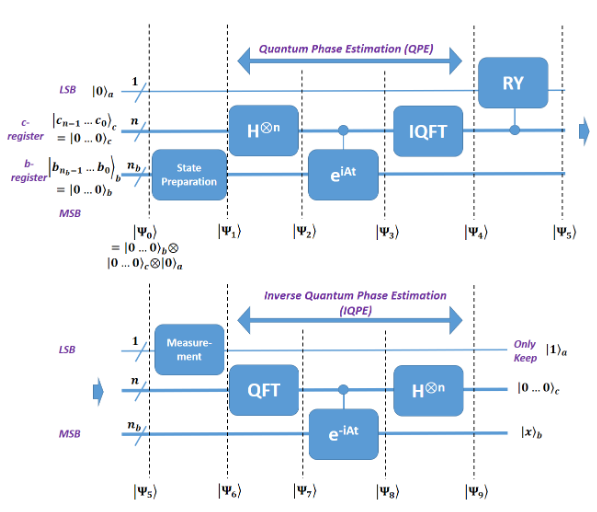

## (1) Preparação de Estado

O número total de qubits é dado por $n_b + n + 1$, sendo todos inicializados como:

\begin{equation}  \vert \Psi_0\rangle = \vert 0 \cdots 0 \rangle_b \vert 0 \cdots 0 \rangle_c \vert 0 \rangle_a = \vert 0 \rangle^{\otimes n_b} \vert 0 \rangle^{\otimes n} \vert 0 \rangle\ \ \ \ \ \ \ \ \ \ \ \  \ \ \ \ \ \ \ \ \ (6)\end{equation}

Nessa etapa do programa, os $b-registers$ são rotacionados de modo a ter os valores correspondentes a $\vec{b}$, ou seja:

\begin{equation}\begin{pmatrix}
\beta_0 \\
\beta_1 \\
\vdots  \\
\beta_{N_b - 1}
\end{pmatrix} = \beta_0 \vert 0 \rangle + \beta_1 \vert 1 \rangle + \cdots + \beta_{N - 1} \vert N - 1 \rangle = \vert b \rangle \ \ \ \ \ \ \ \ (7) \end{equation}


Portanto, podemos alterar o valor de $\Psi_0$ por meio de rotações, escrevendo-o como:

\begin{equation}  \vert \Psi_1\rangle = \vert b \rangle_b \vert 0 \cdots 0 \rangle_c \vert 0 \rangle_a \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ (8)\end{equation}

## (2) Estimação de Fase Quântica (QPE)

Após a preparação do estado inicial, vamos relembrar que $|b\rangle$ pode ser escrito como uma combinação dos autovetores de $A$, que também são autovetores de $U = e^{iAt}$:

$$|\Psi_1\rangle =  |b\rangle_b |0 ... 0\rangle_c |0\rangle_a =\sum_j b_j |u_j\rangle_b |0 ... 0\rangle_c |0\rangle_a$$

Lembramos que: $U \vert u_j \rangle = e^{i \lambda_j t} \vert u_j \rangle $.

Deste modo, a aplicação da estimação de fase no par de registradores $b,c$ adiciona pela linearidade uma aproximação da fase de cada autovetor $|u_j\rangle$ no registrador $c$, gerando:


$$|\Psi_4\rangle =\sum_j b_j |u_j\rangle_b |\tilde{\lambda}_j\rangle_c |0\rangle_a$$,

onde $\tilde{ \lambda}_j =  N \lambda_j t/2 \pi$ e $t$ é escolhido de modo que se obtenha um número inteiro.

## (3) Rotação Controlada e Medida do Qubit-Ancila

Para esse passo, vamos rotacionar o qubit ancilla baseado nos autovalores codificados na etapa anterior (armazenados no $c-register$):

\begin{equation} \vert \Psi_5 \rangle = \sum_{j = 0}^{2^{n_b} - 1} b_j \vert u_j \rangle_b \vert \tilde{ \lambda}_j \rangle_c ( \sqrt{1 - \frac{C^2}{\tilde{ \lambda}_j^2} } \vert 0 \rangle_a + \frac{C}{\tilde{ \lambda}_j} \vert 1 \rangle_a) \ \ \ \ \ \ \ \ \ \ \end{equation}

Destaca-se que os controles dessa rotação serão os valores em $|\tilde{\lambda_j}\rangle_c$. Deste modo, a escolha do ângulo a ser utilizado na rotação controlada depende dos valores possíveis para $\tilde{\lambda_j}$ (que depende também de uma escolha de $t$). Deve-se construir uma rotação que mapeie corretamente cada valor possível no registrador $c$ para o seu respectivo ângulo $\frac{C}{\tilde{\lambda_j}}$ (veremos um exemplo mais tarde).

Após a rotação controlada, só nos interessa o valor que acompanha $\vert 1 \rangle_a$. Logo, realizamos uma medição e, caso seja medido o valor desejado, o próximo estado será: 

\begin{equation} \vert \Psi_6 \rangle = \frac{1}{\sqrt{\sum_{j = 0}^{2^{n_b} - 1} | \frac{b_j C}{\tilde{ \lambda}_j}}|^2} \sum_{j = 0}^{2^{n_b} - 1} b_j \vert u_j \rangle_b \vert \tilde{ \lambda}_j \rangle_c \frac{C}{\tilde{ \lambda}_j} \vert 1 \rangle_a \ \ \ \ \ \ \ \ \ \ \end{equation}

Sendo $| \frac{C}{\tilde{ \lambda}_j} |^2$ a probabilidade de obtermos $\vert 1 \rangle$. Assim, $C$ deve ser grande o bastante para aumentar essa probabilidade. Note que $\Psi_6$ é muito próximo ao valor de $\vert x \rangle$ que queremos encontrar (5). Por fim, outro fator de interesse em $\vert \Psi_6 \rangle$ é que os $b-registers$ estão emaranhados com os $c-registers$ e, consequentemente, não podemos escrever suas partes com um produto tensorial. Portanto, precisamos "desemaranhá-los". 

## (4) Uncomputation -  QPE Inversa (IQPE)

Após isto, aplicamos a estimação de fase inversa para remover a dependência em $|\tilde{\lambda}_j\rangle$ do somatório:

$$|\Psi_6 \rangle = \frac{1}{\sqrt{\sum_{j = 0}^{2^{n_b} - 1} | \frac{b_j C}{\tilde{ \lambda}_j}}|^2} \sum_{j = 0}^{2^{n_b} - 1} \frac{b_jC}{\tilde{ \lambda}_j} \vert u_j \rangle_b \vert \tilde{ \lambda}_j \rangle_c \vert 1 \rangle_a$$

$$ \Rightarrow \vert \Psi_9 \rangle = \frac{C}{\sqrt{\sum_{j = 0}^{2^{n_b} - 1} | \frac{b_j C}{ \lambda_j}}|^2} \left(\sum_{j = 0}^{2^{n_b} - 1}\frac{b_j}{\tilde{ \lambda}_j} \vert u_j \rangle_b\right)  \vert 0 \rangle_c^{\otimes n} \vert 1 \rangle_a = \frac{C}{\sqrt{\sum_{j = 0}^{2^{n_b} - 1} | \frac{b_j C}{ \lambda_j}}|^2} |x\rangle_b  \vert 0 \rangle_c^{\otimes n} \vert 1 \rangle_a$$

Obtém-se assim uma aproximação para $|x\rangle$.



# Cálculo de um Sistema Linear com o HHL

Agora, utilizaremos um exemplo para a solução de um sistema linear com o HHL. 

Seja o sistema linear: 

\begin{equation} A \vec{x} = \vec{b} \end{equation}


\begin{equation}\begin{pmatrix}
1 && \frac{-1}{3}\\
\frac{-1}{3} && 1
\end{pmatrix} \begin{pmatrix}
x_0 \\
x_1
\end{pmatrix} = \begin{pmatrix}
0 \\
1
\end{pmatrix} \end{equation}

Temos que os autovetores de $A$ são $\vec{u_0} = \begin{pmatrix}\frac{-1}{\sqrt{2}} \\ \frac{-1}{\sqrt{2}} \end{pmatrix}$ e $\vec{u_1} = \begin{pmatrix} \frac{-1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{pmatrix}$, com os seguintes autovalores $\lambda_0 = \frac{2}{3}$ e $\lambda_1 = \frac{4}{3}$. Para codificar a base no algoritmo, precisamos fazer $\tilde{\lambda_0} = 1$ e $\tilde{\lambda_1} = 2$, de modo a manter $\tilde{\lambda_1} / \tilde{\lambda_0} = 2$ (importante para a aproximação). Logo, $|\tilde{\lambda_0}\rangle = \vert 01 \rangle$ e $|\tilde{\lambda_1}\rangle = \vert 10 \rangle$. Isso nos dá $n = 2$ (e consequentemente, $N=4$), levando-nos a escolher $t = \frac{3 \pi}{4}$ na equação $\tilde{\lambda_j} = N \lambda_j t/ 2 \pi$. Como $\vec{b}$ é um vetor complexo de duas dimensões, ele pode ser representado por um único qubit, de modo que $n_b = 1$. 

Teoricamente, o valor que estamos interessados é:

\begin{equation} \vec{x} =  \begin{pmatrix}
\frac{3}{8} \\
\frac{9}{8}
\end{pmatrix} \end{equation}



***i. Para a implementação da Porta U controlada***, escolhemos valores de $\theta, \phi, \lambda \ e \ \gamma$ para conseguirmos codificar os autovalores de $A$ nos $c-registers$. Seja CU:
\begin{equation} CU =  \begin{pmatrix}
1 && 0                                            && 0 && 0                                               \\
0 && e^{i \gamma } \cos{\frac{\theta}{2}}         && 0 && -e^{i (\gamma + \lambda)} \sin{\frac{\theta}{2}} \\
0 && 0                                            && 1 && 0                                                \\
0 && e^{i (\gamma + \phi)} \sin{\frac{\theta}{2}} && 0 && -e^{i (\gamma + \phi + \lambda)} \cos{\frac{\theta}{2}}
\end{pmatrix} \end{equation}


Para a implementação da $CU^{-1}$, escolhemos $\theta$ = π/2, $\phi$ = π/2, λ = −π/2, $\gamma$ = −3π/4, de modo que: 

\begin{equation} CU^{-1} =  \frac{1}{2}\begin{pmatrix}
2 && 0    && 0 && 0    \\
0 && -1-i && 0 && 1-i  \\
0 && 0    && 2 && 0    \\
0 && 1-i  && 0 && -1-i
\end{pmatrix} \end{equation} 

***ii. Para a implementação da rotação controlada no qubit ancilla***, utilizamos a porta RY controlada (CRY):

\begin{equation} CRY = \begin{pmatrix}
1 && 0                      && 0 && 0    \\
0 && \cos{\frac{\theta}{2}} && 0 && -\sin{\frac{\theta}{2}}  \\
0 && 0                      && 1 && 0    \\
0 && \sin{\frac{\theta}{2}} && 0 && \cos{\frac{\theta}{2}}
\end{pmatrix} \end{equation} 

Fazendo o $\theta$ de acordo com a função:

\begin{equation} \theta (c) = \theta (c_1 c_0) = 2 \arcsin{\frac{1}{c}} \end{equation} 

De modo que:

\begin{equation} \theta (1) = \theta (01) = 2 \arcsin{\frac{1}{1}} = \pi \\
\theta (2) = \theta (10) = 2 \arcsin{\frac{1}{2}} = \frac{\pi}{3}
\end{equation} 

Ou seja, 

\begin{equation} \theta (c) = \theta (c_1 c_0) = \frac{\pi}{3}c_1 + \pi c_0 \end{equation} 

Em outras palavras, o qubit $c_1$ precisa controlar uma rotação de ângulo $\frac{\pi}{3}$ e o qubit $c_0$ controla a rotação de $\pi$.

**iii. Na substituição numérica,** obtemos o seguinte vetor de estado tendo em vista a discussão anterior:
    
\begin{equation} |\Psi_9\rangle = \frac{1}{2} \sqrt{\frac{2}{5}} (\vert 0 \rangle + 3 \vert 1 \rangle) \vert 00 \rangle \vert 1 \rangle\end{equation}

Portanto, uma boa aproximação para o resultado desejado. O passo-a-passo se encontra na sessão III.E do artigo. 

 **iv. O circuito** referente à resolução desse problema no HHL pode ser visualizado abaixo:
    
![](Images/Circuito.png)

## Aplicação do HHL no código

Neste tópicos, iremos implementar o algoritmo descrito acima no `myqlm`

In [1]:
#Importando as bibliotecas necessárias
from qat.lang.AQASM import *
import numpy as np

In [2]:
#Alocando os bits e qubits, conforme descrito anteriormente
HHL = Program()

ancilla = HHL.qalloc(1) 
clock = HHL.qalloc(2)
inp = HHL.qalloc(1)
measurement = HHL.calloc(4)

Para o código, utilizam-se de portas U já presentes na literatura e que podem ser obtidas a partir da combinação linear de outras portas. No myqlm, é preciso criá-las com o `abstract gate` a partir de sua matriz. 

In [3]:
#Criando a matriz da porta U1
def u1_matrix(cu_um_a):
    return np.array([[1,0], 
                     [0,np.exp(complex(0, cu_um_a))]]) 

#Criando a matriz da porta U
def u_matrix(cu_theta, cu_phi, cu_lamb, cu_gama):
    return np.array([[np.cos(cu_theta/2)*np.exp(complex(0, cu_gama)), -np.sin(cu_theta/2)*np.exp(complex(0, cu_gama+cu_lamb))],
                    [np.sin(cu_theta/2)*np.exp(complex(0, cu_gama+cu_phi)),  np.cos(cu_theta/2)*np.exp(complex(0, cu_gama+cu_lamb+cu_phi))]]) 

#Criando a matriz de uma porta abstrata para inicializar em qualquer estado
def initialize_matrix(linha_1, linha_2):
    return np.array([[np.sqrt(linha_1),np.sqrt(linha_1)], 
                     [np.sqrt(linha_2),-np.sqrt(linha_2)]]) 


#Criando uma porta abstrata para inicializar em qualquer estado
initialize = AbstractGate('Initialize', [float, float], arity=1, matrix_generator=initialize_matrix)

#Criando uma porta abstrata CU1
U_1 = AbstractGate('U1', [float], arity=1, matrix_generator=u1_matrix)

#Criando uma porta abstrata CU
U = AbstractGate('U', [float, float, float, float], arity=1, matrix_generator=u_matrix)

Serão criadas abaixo função da IQFT e QFT a partir da aplicação das portas Hadamard, Swap e $U^{1}$ controlada para posterior utilização na QPE e IQPE, respectivamente.

In [4]:
#Inverse Quantum Fourier Transform
def qft_dagger(circ, q, n):      
    circ.apply(H, clock[1])
    for j in reversed(range(n)):
        for k in reversed(range(j+1,n)):
            U_1(-np.pi/float(2**(k-j))).ctrl(1)(q[k], q[j])
    circ.apply(H, clock[0])
    circ.apply (SWAP, clock[0], clock[1])

#Quantum Fourier Transform
def qft(circ, q, n):
    circ.apply(SWAP, clock[0], clock[1])
    circ.apply(H, clock[0])
    for j in reversed(range(n)):
        for k in reversed(range(j+1,n)):
            U_1(np.pi/float(2**(k-j))).ctrl(1)(q[k], q[j])
    circ.apply(H, clock[1])

Segue abaixo a a implementação da QPE e IQPE. Conforme discutido anteriormente, essas etapas serão responsáveis para o cálculo dos autovalores da matriz A, que farão parte do estado esperado.

In [5]:
#Quantum Phase Estimation
def qpe(circ, clock, target):

    # e^{i*A*t}
    U(np.pi/2, -np.pi/2, np.pi/2, 3*np.pi/4).ctrl(1)(clock[0], inp)
    
    # e^{i*A*t*2}
    U(np.pi, np.pi, 0, 0).ctrl(1)(clock[1], inp)
   
    qft_dagger(circ, clock, 2)
    
#Inverse Quantum Phase Estimation    
def inv_qpe(circ, clock, target):
    
    # Perform a QFT on the register holding the eigenvalues
    qft(circ, clock, 2)

    # e^{i*A*t*2}
    U(np.pi, np.pi, 0, 0).ctrl(1)(clock[1], inp)
   
    # e^{i*A*t}
    U(np.pi/2, np.pi/2, -np.pi/2, -3*np.pi/4).ctrl(1)(clock[0], inp)

Logo abaixo, é feita a implementação do HHL, com todo o passo-a-passo descrito acima.

In [6]:
#Preparing Sate
HHL.apply(initialize(0, 1), inp)


# Aplicar a Tranformação Hadamard
HHL.apply(H, clock[0])
HHL.apply(H, clock[1])

#Aplicar a QPE
qpe(HHL, clock, inp)
    
# Aplicar a rotação controlada 
RY(np.pi).ctrl(1)(clock[0], ancilla)
RY(np.pi/3).ctrl(1)(clock[1], ancilla)

#Aplicar a medida do qubit ancilla
HHL.measure(ancilla, measurement[0])

#Aplicar a QPE Inversa
inv_qpe(HHL, clock, inp)

# Aplicar a Tranformação Hadamard novamente
HHL.apply(H, clock[0])
HHL.apply(H, clock[1])

Segue abaixo a execução do HHL no simulador

In [7]:
# Export this program into a quantum circuit
circuit = HHL.to_circ()

# import one Quantum Processor Unit Factory
from qat.qpus import PyLinalg

# Create a Quantum Processor Unit
linalgqpu = PyLinalg()

# Create a job
job = circuit.to_job()

# Submit the job to the QPU
result = linalgqpu.submit(job)

# Iterate over the final state vector to get all final components
for sample in result:
     print("State %s: probability %s +/- %s amplitude %s " % (sample.state, sample.probability, sample.err, sample.amplitude))

%qatdisplay circuit --svg

State |1>|00>|0>: probability 0.09999999999999994 +/- None amplitude (0.31622776601683783-3.7634175876720684e-17j) 
State |1>|00>|1>: probability 0.8999999999999995 +/- None amplitude (0.9486832980505135-5.645742049289096e-17j) 


Note que esse é o estado esperado:

\begin{equation} |\Psi_9\rangle = \frac{1}{2} \sqrt{\frac{2}{5}} (\vert 0 \rangle + 3 \vert 1 \rangle) \vert 00 \rangle \vert 1 \rangle\end{equation}

# Exercícios:
- 